In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("dark_background")

## 01 - Création des fonds de carte

In [2]:
df_communes = gpd.read_file("a-com2022.json")

In [3]:
df_communes.head()

,codgeo,libgeo,dep,reg,xcl2154,ycl2154,geometry
0,01001,L'Abergement-Clémenciat,01,84,848241,6563021,"POLYGON ((4.90497 46.16079, 4.90280 46.15795, ..."
1,01002,L'Abergement-de-Varey,01,84,887495,6548152,"POLYGON ((5.40440 46.00778, 5.41628 46.00056, ..."
2,01004,Ambérieu-en-Bugey,01,84,882724,6542583,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ..."
3,01005,Ambérieux-en-Dombes,01,84,847277,6545791,"POLYGON ((4.88657 46.01602, 4.88808 46.01061, ..."
4,01006,Ambléon,01,84,902191,6519791,"POLYGON ((5.59066 45.75997, 5.58396 45.76274, ..."


In [8]:
df_departements = (
    df_communes[["geometry", "dep", "xcl2154", "ycl2154"]]
    .dissolve("dep", aggfunc="mean")
    # .agg({"xcl2154": "mean", "ycl2154": "mean",})
    .reset_index()
)

df_departements.head()

,dep,geometry,xcl2154,ycl2154
0,01,"POLYGON ((4.80495 45.90345, 4.80957 45.90635, ...",879465.933842,6.556934e+06
1,02,"POLYGON ((3.16626 49.07803, 3.15871 49.08034, ...",738280.929912,6.939648e+06
2,03,"POLYGON ((2.64069 46.11835, 2.63456 46.11912, ...",714109.028391,6.583566e+06
3,04,"POLYGON ((5.75672 43.73162, 5.74917 43.74044, ...",951774.944444,6.335595e+06
4,05,"POLYGON ((5.77682 44.20566, 5.77352 44.20578, ...",948377.493827,6.391538e+06


## 02 - Fusion des jeux de données

In [7]:
df = pd.read_parquet("clean_data_departements.parquet")
df["code_departement"] = ("0" + df["code_departement"].astype(str) ).str[-2:]
df.head()

,code_departement,hommes-sans_diplomes,hommes-diplome_cep,hommes-diplome_bepc,hommes-diplome_cap,hommes-diplome_bac,hommes-diplome_1e_cycle,hommes-diplome_2e_cycle,femmes-sans_diplomes,femmes-diplome_cep,...,ratio-femmes-diplome_cap,ratio-femmes-diplome_bac,ratio-femmes-diplome_1e_cycle,ratio-femmes-diplome_2e_cycle,ratio-hommes-non_education_superieure,ratio-hommes-education_superieure,ratio-femmes-non_education_superieure,ratio-femmes-education_superieure,ratio-non_education_superieure,ratio-education_superieure
0,01,29349.894926,12572.820171,11190.067906,75744.314798,43145.143182,27247.554823,41986.422196,30509.568682,22821.862427,...,0.112195,0.096235,0.063894,0.100461,0.348800,0.140398,0.346448,0.164354,0.695248,0.304752
1,02,35492.561841,13730.759385,10035.979173,67096.397060,32093.346699,16599.088901,18522.895665,39185.571678,25381.950536,...,0.121634,0.087022,0.051462,0.059679,0.394581,0.087463,0.406816,0.111140,0.801397,0.198603
2,03,16721.038757,10257.101853,6726.263428,45433.193521,21934.391688,11928.006732,14281.978860,18424.836284,19784.835610,...,0.128441,0.097167,0.054432,0.065504,0.375512,0.097378,0.407174,0.119936,0.782686,0.217314
3,04,7747.730470,3552.193109,3279.968189,20506.098616,11347.413427,6752.221953,9790.629664,8620.193371,5575.089107,...,0.114018,0.103482,0.063821,0.095842,0.351768,0.125324,0.363245,0.159663,0.715013,0.284987
4,05,5311.214508,3053.344661,2971.820530,17207.951123,10381.466768,6219.282274,8760.708948,5381.845762,4916.812386,...,0.105863,0.104684,0.072758,0.107901,0.347733,0.133820,0.337789,0.180658,0.685522,0.314478


In [10]:
df = df_departements.merge(
    
    right=df,
    how="right",
    right_on=["code_departement"],
    left_on=["dep"],
)

In [21]:
df = df.sort_values(
        "ratio-education_superieure",
        ascending=False
    )

## 03 - Niveau d'éducation supérieure par département

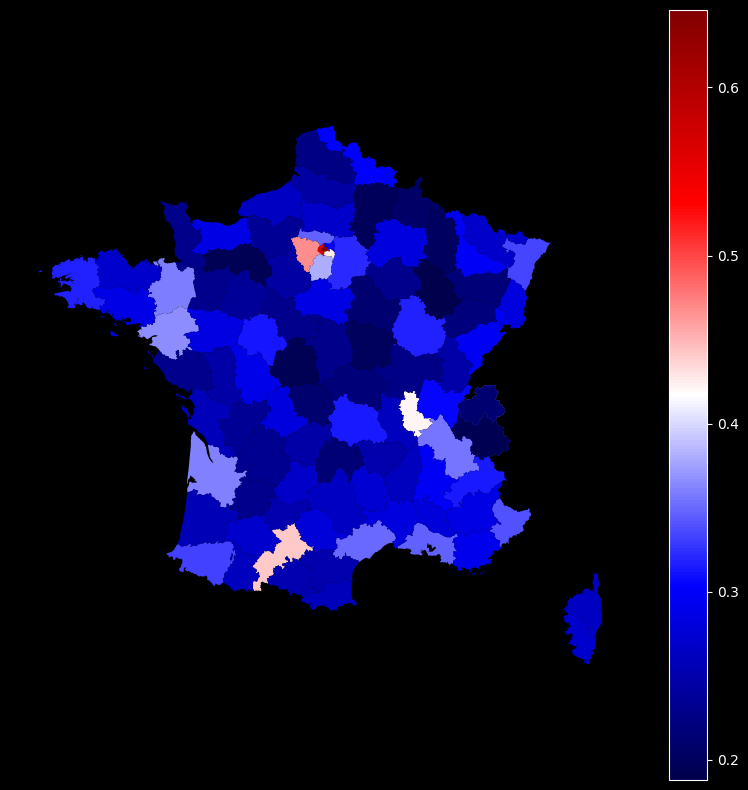

In [32]:
fix, ax = plt.subplots(1, 1, figsize=(10, 10))

df.plot(
    "ratio-education_superieure",
    ax=ax,
    cmap="seismic",
    legend=True,
    # vmin=0,
    # vmax=1,
)

ax.axis("off")

plt.savefig("images/repartition-enseignement-departements.png")

plt.show()

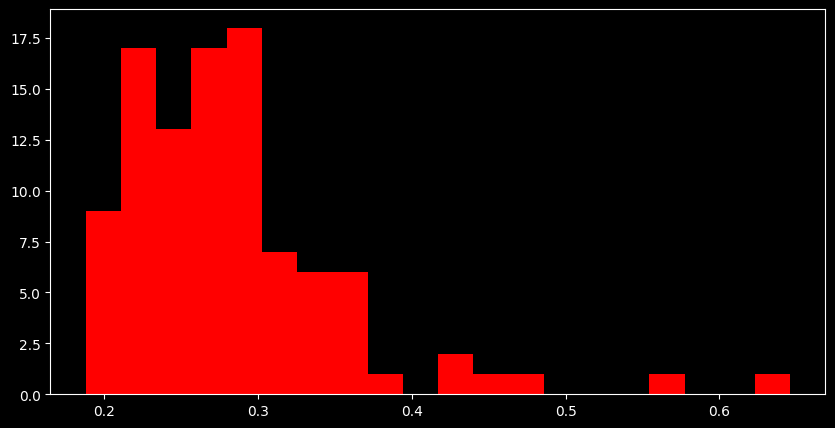

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df["ratio-education_superieure"].hist(
    grid=False,
    ax=ax,
    color="red",
    bins=20,
)

plt.show()

In [23]:
df[["code_departement", "ratio-education_superieure"]].head(10)

,code_departement,ratio-education_superieure
75,75,0.646007
92,92,0.564400
78,78,0.467368
31,31,0.440680
94,94,0.425362
69,69,0.420997
91,91,0.379517
44,44,0.365295
33,33,0.360261
35,35,0.359385


In [24]:
df[["code_departement", "ratio-education_superieure"]].tail(10)

,code_departement,ratio-education_superieure
99,74,0.212664
21,23,0.210461
7,08,0.205207
55,55,0.201725
58,58,0.199282
1,02,0.198603
61,61,0.195116
36,36,0.194558
98,73,0.192745
52,52,0.188092


## 04 - Etude du sexe ratio études supérieures

In [30]:
df["sex_ratio"] = df["ratio-hommes-education_superieure"] / df["ratio-femmes-education_superieure"]

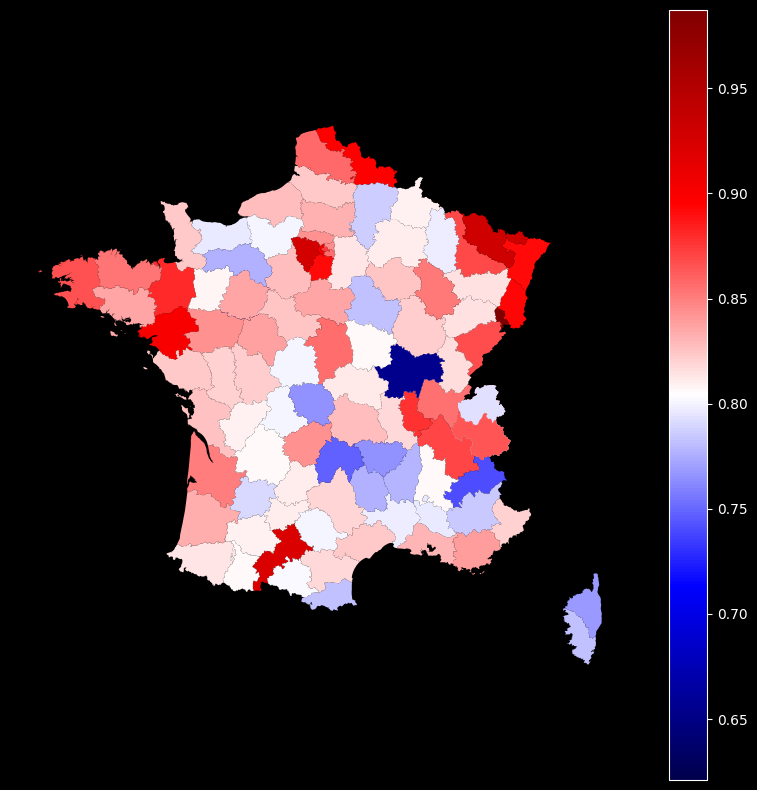

In [31]:
fix, ax = plt.subplots(1, 1, figsize=(10, 10))

df.plot(
    "sex_ratio",
    ax=ax,
    cmap="seismic",
    legend=True
)

ax.axis("off")

plt.show()